In [563]:
!pip install tensorflow_decision_forests
!pip install tf_keras

In [564]:
import os
#Keep using Keras 2
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import tensorflow_decision_forests as tfdf
import numpy as np
import pandas as pd
import tensorflow as tf
import tf_keras
import math

In [577]:
# Load a dataset into a Pandas Dataframe.
dataset_df = pd.read_excel("Data-RF.xlsx")
# Display the first 3 examples.
dataset_df.head(3)

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Gender,Attendance,Grade
0,13.00,24,66.0,Male,High,A
1,15.00,24,67.0,Female,High,A
2,5.25,24,45.0,Male,High,B-


**Encode the categorical labels as integers.**

In [578]:
# Details:
# This stage is necessary if your classification label is represented as a # string since Keras expects integer classification labels. #When using pd_dataframe_to_tf_dataset (see below), this step can be skipped.
# Name of the label column.
#label = "Grade"
#classes = dataset_df[label].unique().tolist()
#print(f"Label classes: {classes}")
#dataset_df[label] = dataset_df[label].map(classes.index)

**70 - 30 Split (327-173)**

In [705]:
# Split the dataset into a training and a testing dataset.
def split_dataset (dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset [~test_indices], dataset[test_indices]
train_ds_pd, test_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples for testing.".format( len(train_ds_pd), len(test_ds_pd)))

327 examples in training, 173 examples for testing.


##Training accuracy for 10 DTs (CART)

In [720]:
model_1 = tfdf.keras.RandomForestModel(verbose=2, categorical_algorithm = "CART", num_trees=10, max_depth=16)
# Train the model.
train_ds= tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label="Grade")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label="Grade")
model_1.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmpknangyya as temporary training directory


Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>), 'Atten

[INFO 24-02-04 07:44:00.0656 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-04 07:44:00.0657 UTC kernel.cc:772] Collect training examples
[INFO 24-02-04 07:44:00.0657 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-04 07:44:00.0658 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-04 07:44:00.0658 UTC kernel.cc:392] Number of examples: 327
[INFO 24-02-04 07:44:00.0659 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-04 07:44:00.0660 UTC kernel.cc:792] Tra

Model trained in 0:00:00.064175
Compiling model...
Model compiled.


###Training accuracy for 10 trees (Plot)

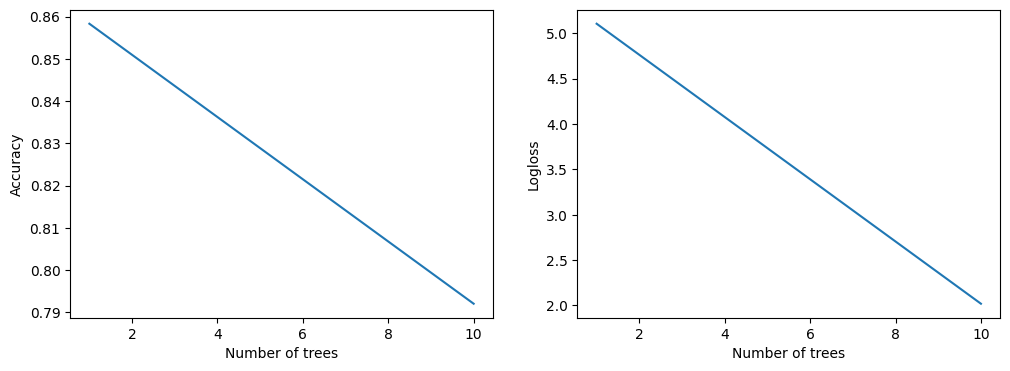

In [721]:
import matplotlib.pyplot as plt
logs = model_1.make_inspector().training_logs()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation. loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss")
plt.show()

###Testing accuracy for 10 DTs (CART)

In [722]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()
for name, value in evaluation.items():
  print(f"{name}: {value:.8f}")

1/1 [==============================] - 0s 267ms/step - loss: 0.0000e+00 - accuracy: 0.8613

loss: 0.00000000
accuracy: 0.86127168


###Plot of Individual DTs (index 0)

In [723]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

###Plot of Individual DTs (index 1)

In [724]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=1, max_depth=3)

##Training accuracy for 30 DTs (CART)

In [725]:
model_1 = tfdf.keras.RandomForestModel(verbose=2, categorical_algorithm="CART", num_trees=30, max_depth=16)
#Train the model.
model_1.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmpyb7x57iy as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.

[INFO 24-02-04 07:44:25.0168 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-04 07:44:25.0168 UTC kernel.cc:772] Collect training examples
[INFO 24-02-04 07:44:25.0168 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-04 07:44:25.0169 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-04 07:44:25.0169 UTC kernel.cc:392] Number of examples: 327
[INFO 24-02-04 07:44:25.0170 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-04 07:44:25.0171 UTC kernel.cc:792] Tra

Model trained in 0:00:00.175584
Compiling model...
Model compiled.


Testing accuracy for 30 trees did not improve from that of 10 trees. (86.127168)

###Training accuracy for 30 DTs (Plot)

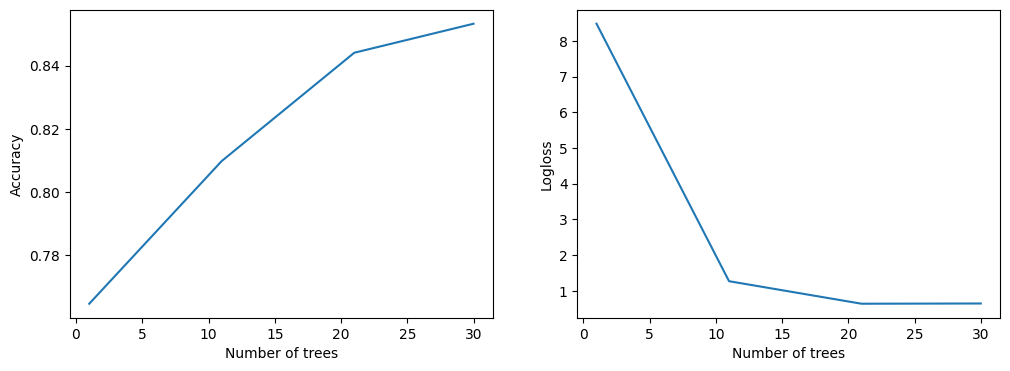

In [726]:
import matplotlib.pyplot as plt
logs = model_1.make_inspector().training_logs()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss")
plt.show()

Using number of trees = 28, max_depth =12. Accuracy = 86.5443

In [778]:
model_1 = tfdf.keras.RandomForestModel(verbose=2, categorical_algorithm="CART", num_trees=28, max_depth=12)
#Train the model.
model_1.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmp_yunljnl as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.

[INFO 24-02-04 08:01:50.1393 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-04 08:01:50.1393 UTC kernel.cc:772] Collect training examples
[INFO 24-02-04 08:01:50.1393 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-04 08:01:50.1394 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-04 08:01:50.1395 UTC kernel.cc:392] Number of examples: 327
[INFO 24-02-04 08:01:50.1395 UTC data_spec_inference.cc:305] 2 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Gender (2 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 24-02-04 08:01:50.1396 UTC kernel.cc:792] Tra

Model trained in 0:00:00.132685
Compiling model...
Model compiled.


##Visualising Hypothesis space of the dataset by using scatterplot

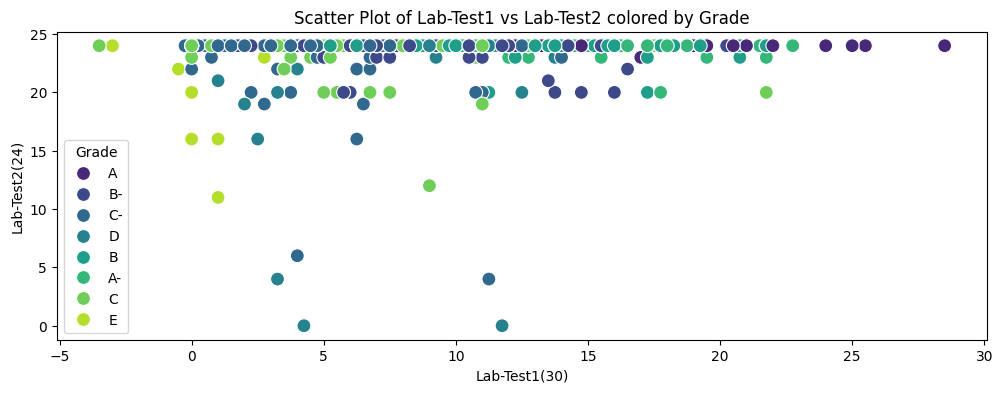

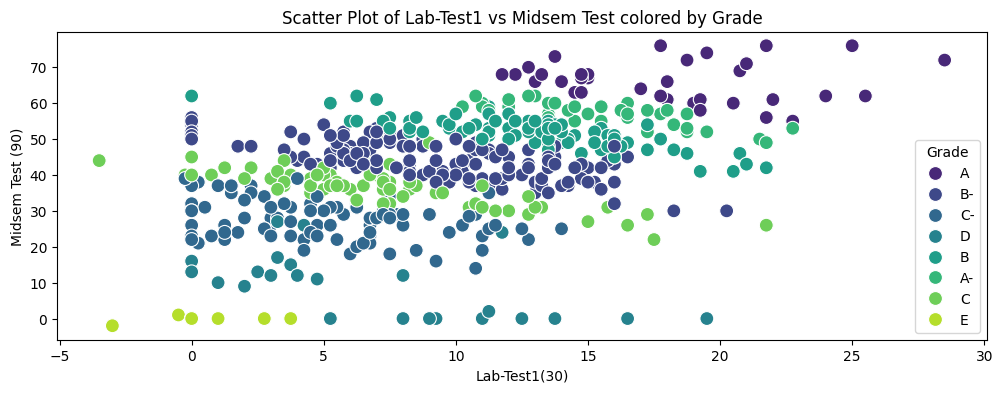

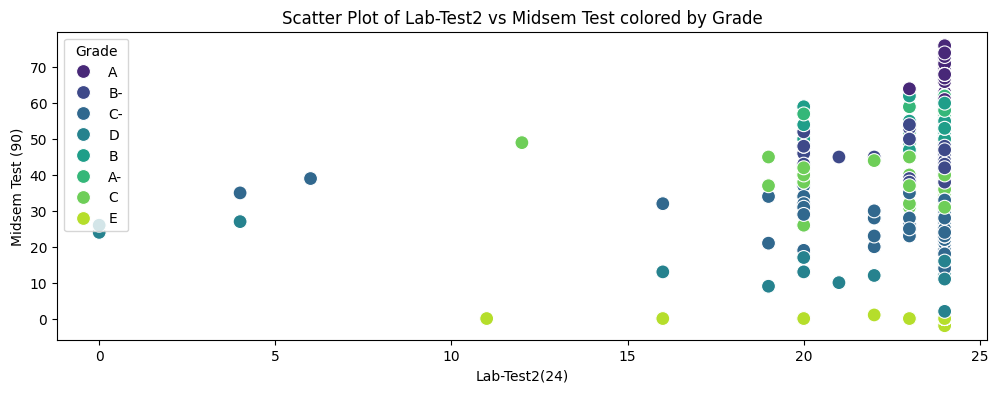

In [714]:
import seaborn as sns
plt.figure(figsize=(12, 4))
sns.scatterplot(x='Lab-Test1(30)', y='Lab-Test2(24)', hue='Grade', data=dataset_df, palette='viridis', edgecolor='w', s=100)
plt.title('Scatter Plot of Lab-Test1 vs Lab-Test2 colored by Grade')
plt.show()

plt.figure(figsize=(12, 4))
sns.scatterplot(x='Lab-Test1(30)', y='Midsem Test (90)', hue='Grade', data=dataset_df, palette='viridis', edgecolor='w', s=100)
plt.title('Scatter Plot of Lab-Test1 vs Midsem Test colored by Grade')
plt.show()

plt.figure(figsize=(12, 4))
sns.scatterplot(x='Lab-Test2(24)', y='Midsem Test (90)', hue='Grade', data=dataset_df, palette='viridis', edgecolor='w', s=100)
plt.title('Scatter Plot of Lab-Test2 vs Midsem Test colored by Grade')
plt.show()

##Gradient Boosted Decision Tree (GBDT)

In [800]:
# Create the GBDT model
model_2 = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.CLASSIFICATION)
model_2.fit(train_ds)
model_2.compile(metrics=["accuracy"])
evaluation_gbdt = model_2.evaluate(test_ds, return_dict=True)
# Print the results for GBDT
print("\nGradient Boosted Decision Tree Model:")
for name, value in evaluation_gbdt.items():
    print(f"{name}: {value:.8f}")


Use /tmp/tmpbinn9fsq as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.251520. Found 327 examples.
Training model...
Model trained in 0:00:00.475315
Compiling model...
Model compiled.
1/1 [==============================] - 1s 875ms/step - loss: 0.0000e+00 - accuracy: 0.8324

Gradient Boosted Decision Tree Model:
loss: 0.00000000
accuracy: 0.83236992


Accuracy for Random Forest with 30 DT: 85.3211<br>
Accuracy for GBDT: 83.236992